In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns


In [3]:
def to_one_hot(y, num_classes=10):
    return np.eye(num_classes)[y]

# Charger les données MNIST
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Prétraitement des données
X_train = X_train.reshape(-1, 784) / 255.0
X_test = X_test.reshape(-1, 784) / 255.0
y_train_one_hot = to_one_hot(y_train)

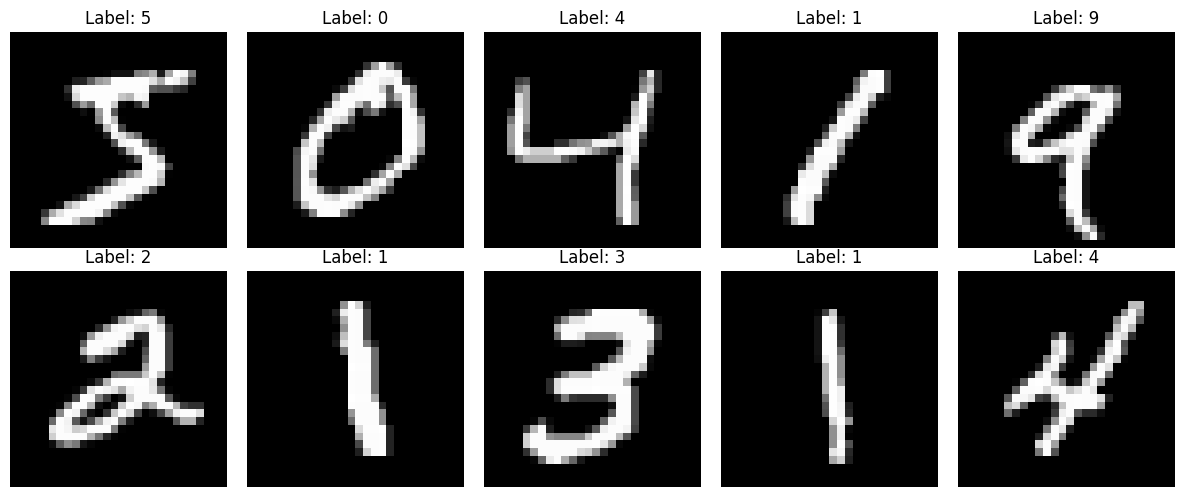

In [4]:
# Visualiser quelques images d'entraînement
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i].reshape(28, 28), cmap='gray')
    ax.set_title(f'Label: {y_train[i]}')
    ax.axis('off')
plt.tight_layout()
plt.show()

In [23]:
# Initialiser le réseau
from Dense import Dense
from ReLU import ReLU
from Softmax import Softmax
from Tanh import Tanh
from LossUtils import categorical_cross_entropy, categorical_cross_entropy_prime, mse, mse_prime
from LeafNetwork import LeafNetwork

nn = LeafNetwork(784)
nn.add(Dense(784, 128))
nn.add(ReLU())
nn.add(Dense(128, 64))
nn.add(ReLU())
nn.add(Dense(64, 10))

# Entraîner le réseau
history = nn.train(X_train[:40000], y_train_one_hot[:40000], epochs=20, learning_rate=0.0006)

# Sauvegarder le modèle
nn.save("mnist_model.json")

Epoch: 0 - Error: 0.06750862388439888
Epoch: 1 - Error: 0.043651239318812324888
Epoch: 2 - Error: 0.036574809818920896232
Epoch: 3 - Error: 0.0325100009804269660896
Epoch: 4 - Error: 0.029774813123765467696
Epoch: 5 - Error: 0.0277507672839354665467
Epoch: 6 - Error: 0.026149387491938906546
Epoch: 7 - Error: 0.0248392338736776778906
Epoch: 8 - Error: 0.023734956484480566767
Epoch: 9 - Error: 0.022787776560468494056
Epoch: 10 - Error: 0.02196472860628475249
Epoch: 11 - Error: 0.021239076770037436475
Epoch: 12 - Error: 0.0205927317933289827436
Epoch: 13 - Error: 0.0200092734432252768982
Epoch: 14 - Error: 0.019479754805558594527
Epoch: 15 - Error: 0.018996135512532863859
Epoch: 16 - Error: 0.018552233791423853286
Epoch: 17 - Error: 0.018141638012246712385
Epoch: 18 - Error: 0.0177616815087432056712
Epoch: 19 - Error: 0.0174063082842305033205
End Epoch: 19 - Error: 0.017406308284230503

In [7]:
#load model
nn = LeafNetwork.load("mnist_model.json")
history = [0.0, 0.0]

In [14]:
# Visualiser la courbe d'apprentissage
plt.plot(nn.error_history)
plt.title('Courbe d\'apprentissage')
plt.xlabel('Epochs')
plt.ylabel('Erreur')
plt.show()

AttributeError: 'LeafNetwork' object has no attribute 'error_history'

In [24]:
# Tester le réseau
predictions = nn.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
accuracy = np.mean(predicted_labels == y_test)
print(f"Test Accuracy: {accuracy:.4f}")

Test Accuracy: 0.9371


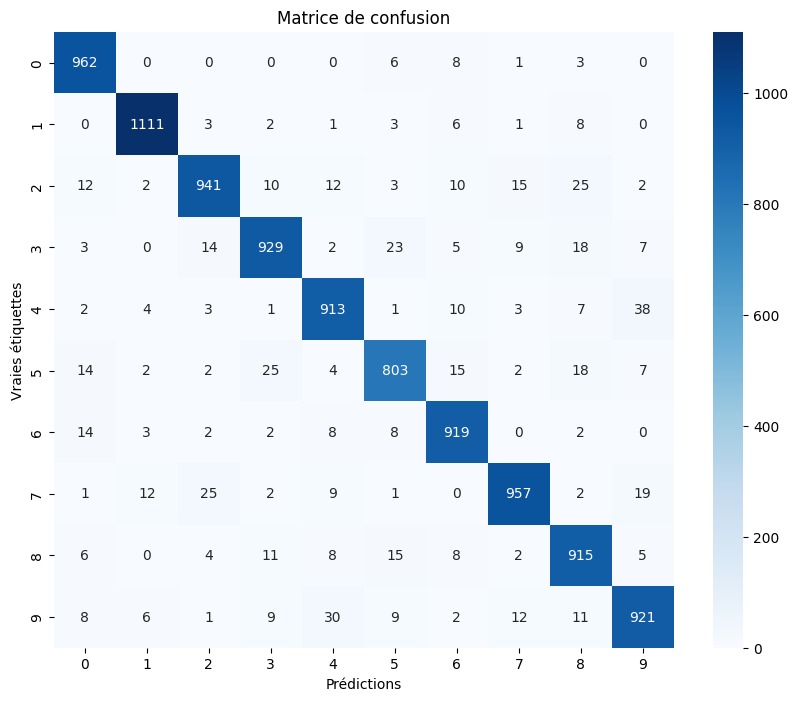

In [36]:
# Afficher la matrice de confusion
cm = confusion_matrix(y_test, predicted_labels)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vraies étiquettes')
plt.savefig('images/confusion_matrix.png')
plt.show()

Score: 13/15


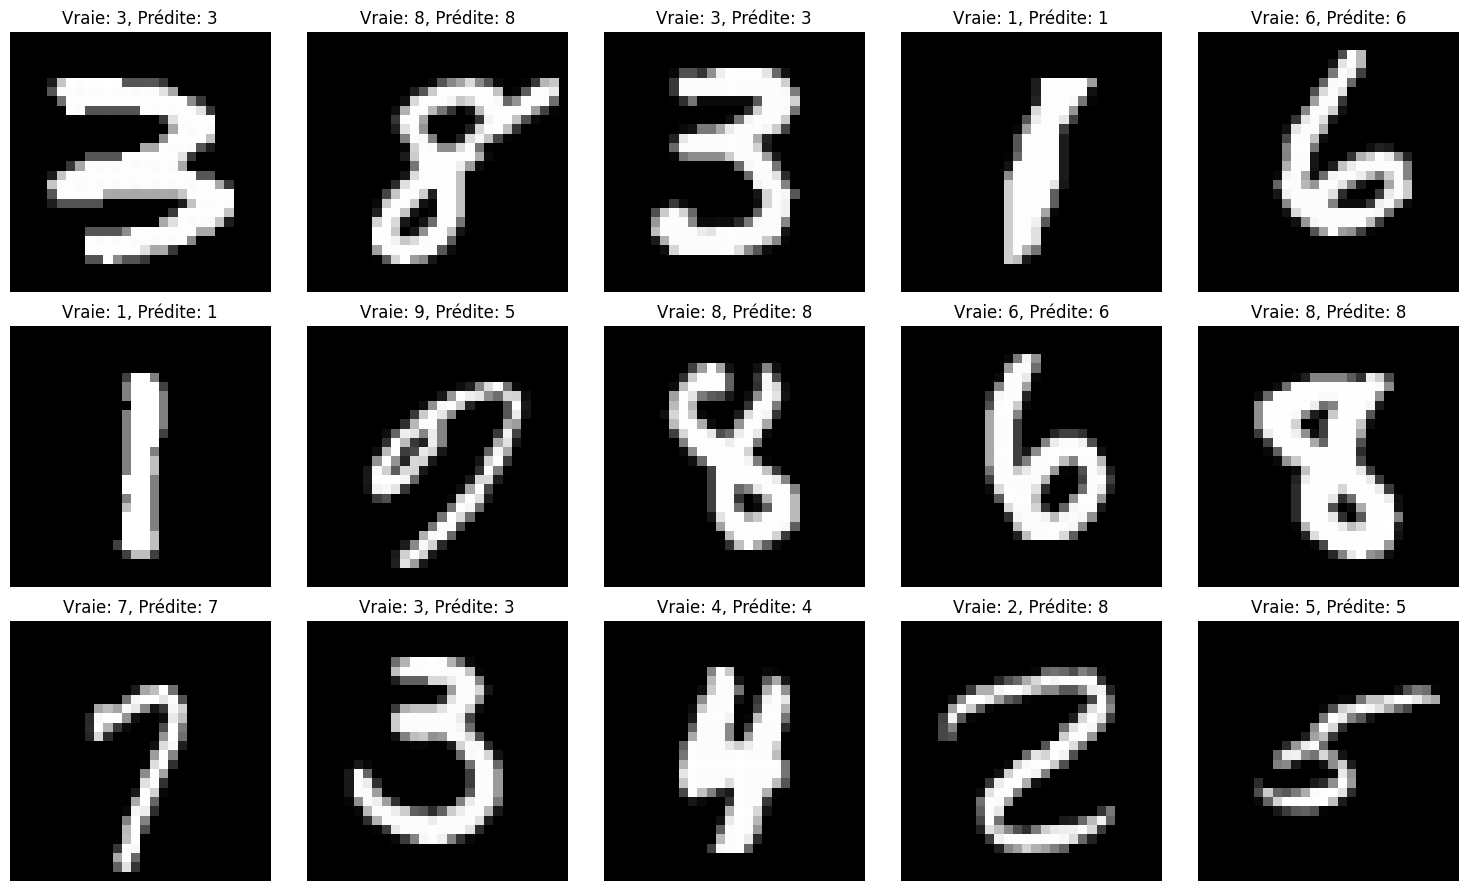

In [35]:
# Visualiser quelques prédictions
fig, axes = plt.subplots(3, 5, figsize=(15, 9))
current_score = 0
for i, ax in enumerate(axes.flat):
    idx = np.random.randint(len(X_test))
    ax.imshow(X_test[idx].reshape(28, 28), cmap='gray')
    ax.set_title(f'Vraie: {y_test[idx]}, Prédite: {predicted_labels[idx]}')
    if y_test[idx] == predicted_labels[idx]:
        current_score += 1
    ax.axis('off')
plt.tight_layout()
# print score
print(f"Score: {current_score}/{len(axes.flat)}")
plt.show()

In [19]:
from Draw import DrawAndPredict


draw_and_predict = DrawAndPredict(nn)

ModuleNotFoundError: No module named 'ipympl'